## Import Libraries for Math, Distributions, Plotting

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.stats import uniform as uni
# from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from scipy.stats import multivariate_normal
# import scipy.stats as sstats 
from ipywidgets import *

## Sample from $\Lambda$

In [6]:
num_samples = np.array([1E2, 1E3, 1E4, 1E5]).astype('int')

skew_range = np.array([1, 2, 4])

# Number of Samples used for optional Emulation
emulate = False
num_emulate = int(1E5)

## Define QoI
The following linear map $Q_s: \mathbb{R}^2 \to \mathbb{R}^2$ is defined to have skewness $s$ at all $\lambda \in \Lambda$.  

$$
Q_s(\lambda) = \lbrace \, \lambda_1, \; \lambda_1 \sqrt{s^2 - 1} + \lambda_2 \, \rbrace
$$

In [ ]:
num_trials = 20
ell_1_error = np.zeros((dim_input.size, num_samples.size, num_trials))

for s_idx, s in enumerate(skew_range):
    print('Dimension = ', s)
    
    pf_dens = chi2(d)
    a, b = pf_dens.interval(0.2)
    obs_dens = sstats.uniform(a, b-a)
    if emulate:
        lam_emulate = np.random.normal(size=(num_emulate,d))
        q_emulate = np.sum(lam_emulate**2,axis=1)
    for N_idx, N in enumerate(num_samples):
        for k in range(num_trials):
            print('(k, n) = ', kn)
            lam = np.random.normal( size=(n, d) )
            q = np.sum(lam**2, axis=1)
            pf_dens_approx = gkde(q)
            if emulate:
                ell_1_error[d_iter,n_iter,k]= ( 1.0/num_emulate * np.sum(np.abs(obs_dens.pdf(q_emulate)*
                                                   (1/pf_dens.pdf(q_emulate) -
                                               1/pf_dens_approx.evaluate(q_emulate)))) )
            else:                      
                ell_1_error[d_iter,n_iter,k]= ( 1.0/n * np.sum(np.abs(obs_dens.pdf(q)*
                                                    (1/pf_dens.pdf(q) -
                                                1/pf_dens_approx.evaluate(q)))) )

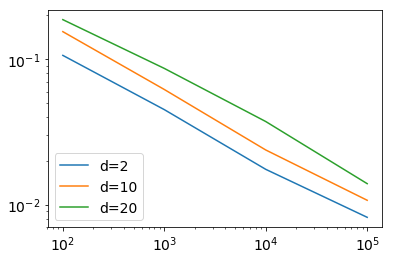

In [7]:
plt.loglog(num_samples, np.mean(ell_1_error[0,:,:],axis=1), label='d=2')
plt.loglog(num_samples, np.mean(ell_1_error[1,:,:],axis=1), label='d=10')
plt.loglog(num_samples, np.mean(ell_1_error[2,:,:],axis=1), label='d=20')
plt.legend(loc=3)

plt.savefig('convergence_linearQ_paramDim_d_vs_samples.pdf')

In [8]:
print(np.mean(ell_1_error[0,:,:],axis=1)/np.mean(ell_1_error[2,:,:],axis=1))

[ 0.56780449  0.52063306  0.46907253  0.58689459]


# Different vector-valued Q

In [9]:
num_samples = np.array([1E2, 1E3, 1E4, 1E5]).astype('int')

lam_dim = np.array([10])

#num_emulate = int(1E5)

q_dim = np.array([1, 2, 5])

In [11]:
a, b = pf_dens.interval((0.4))

plt.scatter(lam_emulate[:,0], q_emulate[:,0])
plt.plot([a, b, b, a, a], [a, a, b, b, a],'r')

plt.figure(2)
np.count_nonzero(np.where(q_emulate[:,0] < b))

NameError: name 'lam_emulate' is not defined

In [ ]:
repeat = 20

ell_1_error = np.zeros((q_dim.size,num_samples.size,repeat))

d = lam_dim[0]

m_iter = 0
for m in q_dim:
    print('Dimension = ', m)
    pf_dens = chi2(1)
    a, b = pf_dens.interval((0.4)**(1/m))
    obs_dens = sstats.uniform(a, b)
    lam_emulate = np.random.normal(size=(num_emulate,d))
    q_emulate = lam_emulate[:,0:m]**2
    n_iter = 0
    for n in num_samples:
        for k in range(repeat):
            print('n = ', n)
            lam = np.random.normal(size=(n,d))
            q = lam[:,0:m]**2
            pf_dens_approx = gkde(q.transpose())
            #obs_dens_array = np.ones((num_emulate,))
            #pf_dens_array = np.ones((num_emulate,))
            obs_dens_array = np.ones((n,))
            pf_dens_array = np.ones((n,))
            for i in range(m):
                #obs_dens_array *= obs_dens.pdf(q_emulate[:,i])
                #pf_dens_array *= pf_dens.pdf(q_emulate[:,i])
                obs_dens_array *= obs_dens.pdf(q[:,i])
                pf_dens_array *= pf_dens.pdf(q[:,i])
            #ell_1_error[m_iter,n_iter,k]= (1.0/num_emulate * 
            #                               np.sum(np.abs(obs_dens_array *
            #                                    (1/pf_dens_array-
            #                                    1/pf_dens_approx.evaluate(q_emulate.transpose())
            #                                    )
            #                                            )
            #                                     )
            #                              )
            ell_1_error[m_iter,n_iter,k]= (1.0/n * 
                                           np.sum(np.abs(obs_dens_array *
                                                (1/pf_dens_array-
                                                1/pf_dens_approx.evaluate(q.transpose())
                                                )
                                                        )
                                                 )
                                          )
        n_iter +=1
    m_iter += 1

In [ ]:
print(ell_1_error)

In [ ]:
plt.loglog(num_samples, np.mean(ell_1_error[0,:,:],axis=1), label='m=1')
plt.loglog(num_samples, np.mean(ell_1_error[1,:,:],axis=1), label='m=2')
plt.loglog(num_samples, np.mean(ell_1_error[2,:,:],axis=1), label='m=5')
plt.legend(loc=3)

plt.savefig('convergence_linearQ_QDim_m_vs_samples.pdf')

# Sequential inversion -- version 1, separate denominator into product of marginals

In [ ]:
from weighted_kde import gaussian_kde

In [ ]:
rv = multivariate_normal(mean = np.zeros(10), cov = np.eye(10))

In [ ]:
num_samples = np.array([1E2, 1E3, 1E4, 1E5]).astype('int')

lam_dim = np.array([10])

q_dim = np.array([1, 2, 5])

In [ ]:
repeat = 20

ell_1_error = np.zeros((q_dim.size,num_samples.size,repeat))

d = lam_dim[0]

m_iter = 0
for m in q_dim:
    print('Dimension = ', m)
    pf_dens = chi2(1)
    a, b = pf_dens.interval((0.4)**(1/m))
    obs_dens = sstats.uniform(a, b)
    n_iter = 0
    for n in num_samples:
        for k in range(repeat):
            print('n = ', n)
            lam = np.random.normal(size=(n,d))
            obs_dens_array = np.ones((n,))
            pf_dens_array = np.ones((n,))
            pf_dens_approx_array = np.ones((n,))
            #prior_weights = rv.pdf(lam)
            for i in range(m):
                q = lam[:,i]**2
                #if i == 0:
                #    pf_dens_approx = gkde(q)
                #else:
                #    pf_dens_approx = gaussian_kde(q, weights=prior_weights)
                pf_dens_approx = gkde(q)
                pf_dens_approx_array *= pf_dens_approx.evaluate(q.transpose())
                obs_dens_array *= obs_dens.pdf(q)
                pf_dens_array *= pf_dens.pdf(q)
                #post_weights = prior_weights * obs_dens.pdf(q)/pf_dens_approx.evaluate(q)
                #prior_weights = post_weights
            ell_1_error[m_iter,n_iter,k]= (1.0/n * 
                                           np.sum(np.abs(obs_dens_array*(
                                               1/pf_dens_array-
                                               1/pf_dens_approx_array)
                                                         )
                                                )
                                          )
        n_iter +=1
    m_iter += 1

In [ ]:
plt.loglog(num_samples, np.mean(ell_1_error[0,:,:],axis=1), label='m=1')
plt.loglog(num_samples, np.mean(ell_1_error[1,:,:],axis=1), label='m=2')
plt.loglog(num_samples, np.mean(ell_1_error[2,:,:],axis=1), label='m=5')
plt.legend(loc=3)

plt.savefig('convergence_linearQ_QDim_m_sequential_vs_samples.pdf')

## Accept/reject sampling of posterior if samples come from prior

In [ ]:
lam_accept = [lam[:,0]]
r = obs_dens.pdf(q)/pf_dens.evaluate(q)
M = np.max(r)
eta_r = r/M
for i in range(num_samples):
    xi = np.random.uniform(0,1)
    if eta_r[i] > xi:
        lam_accept.append(lam[:,i])

In [ ]:
lam_accept = np.array(lam_accept)

In [ ]:
plt.scatter(lam[0,:],lam[1,:])
plt.scatter(lam_accept[:,0],lam_accept[:,1])

In [ ]:
post_dens = gkde(lam_accept.transpose()) # Not very useful

In [ ]:
# Can plot "slices" of densities to observe differences between posterior and prior, but not that useful
plt.plot(x, post_dens.evaluate(pts1),'r')

plt.plot(x, prior_dens.pdf(pts1.transpose()))

In [ ]:
post_dens_TP = gkde(np.sum(lam_accept.transpose(),axis=0)) #Construct the push-forward of the posterior used accepted samples

In [ ]:
plt.plot(x,post_dens_TP.evaluate(x)) #Plot the push-forward of the posterior, should look like the observed density

## QoI: $q=\lambda_1$

In [ ]:
q = lam[0,:]
q.shape

## Push-forward density

In [ ]:
pf_dens = gkde(q)

## Import `scipy.stats` to construct observed density

In [ ]:
obs_dens = sstats.uniform(0, 2)

## Accept/reject sampling of posterior

In [ ]:
lam_accept = [lam[:,0]]
r = obs_dens.pdf(q)/pf_dens.evaluate(q)
M = np.max(r)
eta_r = r/M
for i in range(num_samples):
    xi = np.random.uniform(0,1)
    if eta_r[i] > xi:
        lam_accept.append(lam[:,i])

In [ ]:
lam_accept = np.array(lam_accept)

In [ ]:
plt.scatter(lam[0,:],lam[1,:])
plt.scatter(lam_accept[:,0],lam_accept[:,1])

In [ ]:
def pltaccept(N):
    plt.scatter(lam[0,:],lam[1,:],s=2)
    plt.scatter(lam_accept[0:N,0],lam_accept[0:N,1],s=4)

num_accept = lam_accept.shape[0]
interact(pltaccept, N=(1,num_accept,10))

In [ ]:
post_dens = gkde(lam_accept.transpose()) #Again, not that useful

In [ ]:
plt.plot(x, post_dens.evaluate(pts1),'r') #Again...not that useful
plt.plot(x, prior_dens.pdf(pts1.transpose()))

In [ ]:
post_dens_TP = gkde(lam_accept[:,0])

In [ ]:
plt.plot(x,post_dens_TP.evaluate(x))

## QoI: $q=\lambda_1$

In [ ]:
lam2 = np.repeat(lam,[100,axis=0)
lam2.shape

In [ ]:
xi_num = 1
q = lam[0,:]
xi = np.random.randn(int(1E4*xi_num)) * 10
q = np.repeat(q,xi_num) + xi
q.shape

## Push-forward density

In [ ]:
pf_dens = gkde(q)

## Import `scipy.stats` to construct observed density

In [ ]:
obs_dens = sstats.uniform(0, 2)

## Accept/reject sampling of posterior

In [ ]:
lam_accept = [lam[:,0]]
r = obs_dens.pdf(q)/pf_dens.evaluate(q)
M = np.max(r)
eta_r = r/M
for i in range(num_samples):
    eta = np.random.uniform(0,1)
    if eta_r[i] > eta:
        lam_accept.append(lam[:,i])

In [ ]:
lam_accept = np.array(lam_accept)

In [ ]:
plt.scatter(lam[0,:],lam[1,:])
plt.scatter(lam_accept[:,0],lam_accept[:,1])

In [ ]:
def pltaccept(N):
    plt.scatter(lam[0,:],lam[1,:],s=2)
    plt.scatter(lam_accept[0:N,0],lam_accept[0:N,1],s=4)

num_accept = lam_accept.shape[0]
interact(pltaccept, N=(1,num_accept,10))

In [ ]:
post_dens = gkde(lam_accept.transpose()) #Again, not that useful

In [ ]:
plt.plot(x, post_dens.evaluate(pts1),'r') #Again...not that useful
plt.plot(x, prior_dens.pdf(pts1.transpose()))

In [ ]:
post_dens_TP = gkde(lam_accept[:,0])

In [ ]:
plt.plot(x,post_dens_TP.evaluate(x))